In [1]:
import gpytorch
import torch
lanczos_iters = 10

## Check Spectrum using Lanczos in Gpytorch
##### Create a Random Matrix
##### Make it Hermitian (Normal)
##### Find the Spectrum using the Lanczos Approximation

/var/folders/6x/968yrv5913bf3cjf51gcdxvw0000gn/T/ipykernel_31235/1817821561.py:38: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)


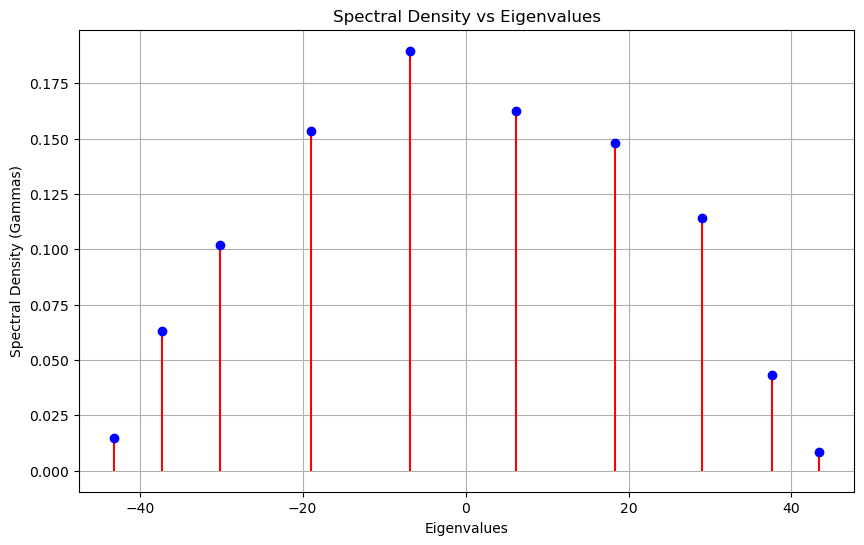

In [2]:
dimension = 1000
M = torch.randn([dimension,dimension])
M += M.T.clone()
M = M/2

v = torch.randn([dimension,])
v_normalized = v / torch.norm(v, p=2)

def Hess_Vec(M,v):
    return torch.matmul(M,v)

def Hess_Vec(M):
    def matvec(v):
        return torch.matmul(M, v)
    return matvec

P = M.shape[0]

# Create the closure by calling Hess_Vec with matrix M
matvec_closure = Hess_Vec(M)

# Perform Lanczos tridiagonalization using the closure
Q, T = gpytorch.utils.lanczos.lanczos_tridiag(
    matvec_closure,
    max_iter=lanczos_iters,
    dtype=torch.float32,
    device='cpu',
    matrix_shape=(P, P)
)

eigvals, eigvects = torch.linalg.eigh(T)
gammas = eigvects[0, :] ** 2

import matplotlib.pyplot as plt

# Assuming 'eigvals' and 'gammas' are already computed as shown in previous discussions
plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)
plt.setp(markerline, color='b', marker='o')  # Blue markers
plt.setp(stemlines, color='r')  # Red stems
plt.setp(baseline, visible=False)  # Hide the baseline

plt.title('Spectral Density vs Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Spectral Density (Gammas)')
plt.grid(True)
plt.show()


/var/folders/6x/968yrv5913bf3cjf51gcdxvw0000gn/T/ipykernel_31235/31273464.py:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)


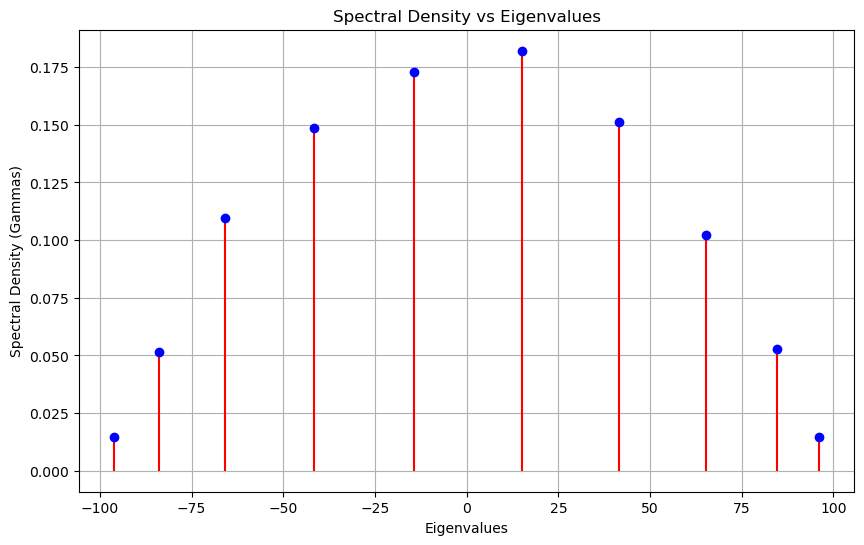

In [3]:
dimension = 5000
M = torch.randn([dimension,dimension])
M += M.T.clone()
M = M/2

v = torch.randn([dimension,])
v_normalized = v / torch.norm(v, p=2)

def Hess_Vec(M,v):
    return torch.matmul(M,v)

def Hess_Vec(M):
    def matvec(v):
        return torch.matmul(M, v)
    return matvec

P = M.shape[0]

# Create the closure by calling Hess_Vec with matrix M
matvec_closure = Hess_Vec(M)

# Perform Lanczos tridiagonalization using the closure
Q, T = gpytorch.utils.lanczos.lanczos_tridiag(
    matvec_closure,
    max_iter=lanczos_iters,
    dtype=torch.float32,
    device='cpu',
    matrix_shape=(P, P)
)

eigvals, eigvects = torch.linalg.eigh(T)
gammas = eigvects[0, :] ** 2

# Assuming 'eigvals' and 'gammas' are already computed as shown in previous discussions
plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)
plt.setp(markerline, color='b', marker='o')  # Blue markers
plt.setp(stemlines, color='r')  # Red stems
plt.setp(baseline, visible=False)  # Hide the baseline

plt.title('Spectral Density vs Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Spectral Density (Gammas)')
plt.grid(True)
plt.show()


/var/folders/6x/968yrv5913bf3cjf51gcdxvw0000gn/T/ipykernel_31235/1398234000.py:40: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)


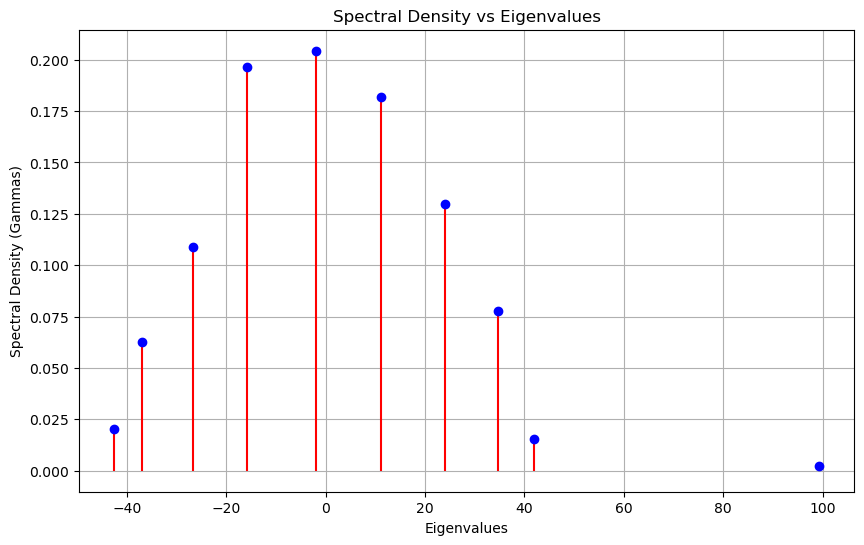

In [4]:
dimension = 1000
M = torch.randn([dimension,dimension])
M += M.T.clone()
M = M/2
import numpy as np
M += torch.ones([dimension,dimension])/(np.sqrt(dimension)/3)

v = torch.randn([dimension,])
v_normalized = v / torch.norm(v, p=2)

def Hess_Vec(M,v):
    return torch.matmul(M,v)

def Hess_Vec(M):
    def matvec(v):
        return torch.matmul(M, v)
    return matvec

P = M.shape[0]

# Create the closure by calling Hess_Vec with matrix M
matvec_closure = Hess_Vec(M)

# Perform Lanczos tridiagonalization using the closure
Q, T = gpytorch.utils.lanczos.lanczos_tridiag(
    matvec_closure,
    max_iter=lanczos_iters,
    dtype=torch.float32,
    device='cpu',
    matrix_shape=(P, P)
)

eigvals, eigvects = torch.linalg.eigh(T)
gammas = eigvects[0, :] ** 2

import matplotlib.pyplot as plt

# Assuming 'eigvals' and 'gammas' are already computed as shown in previous discussions
plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)
plt.setp(markerline, color='b', marker='o')  # Blue markers
plt.setp(stemlines, color='r')  # Red stems
plt.setp(baseline, visible=False)  # Hide the baseline

plt.title('Spectral Density vs Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Spectral Density (Gammas)')
plt.grid(True)
plt.show()


In [5]:
T
old_T = T

In [18]:
#Hand implementation of Lanczos
def Hess_Vec(M,v):
    return torch.matmul(M,v)

T = torch.zeros([lanczos_iters+1, lanczos_iters+1])
q_old = torch.zeros_like(v)  # Ensure q_old is a vector of the same size as r
v = torch.randn([dimension,])
b = torch.norm(v, p=2)
v /= b

w = Hess_Vec(M, v)
alpha = torch.dot(w,v)
T[0, 0] = alpha
w -= alpha*v
v_old = v
for i in range(0,lanczos_iters):
    b = torch.norm(w,2)
    T[i+1,i] = b
    T[i,i+1] = b
    v = w/b
    w = Hess_Vec(M, v)
    alpha = torch.dot(w,v)
    T[i+1, i+1] = alpha
    w -= (alpha*v+b*v_old)
    v_old = v

In [19]:
old_T

tensor([[-9.2040e-01,  2.2158e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 2.2158e+01,  4.1074e+00,  3.0039e+01,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  3.0039e+01,  3.8125e+01,  5.0420e+01,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  5.0420e+01,  3.9601e+01,  2.9905e+01,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  2.9905e+01,  4.5908e+00,
          2.1641e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.1641e+01,
          1.0004e+00,  2.2523e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          2.2523e+01, -1.2288e+0

In [20]:
T

tensor([[ 1.9615, 21.3831,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [21.3831,  2.0330, 21.8044,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000, 21.8044,  1.9196, 25.4468,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 25.4468, 16.4528, 41.9018,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, 41.9018, 54.0299, 40.8944,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000, 40.8944, 17.2510, 24.0985,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 24.0985,  1.3574, 22.7489,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 22.7489,  0.9004,
         22.8333,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0

In [21]:
import torch

# Assume T is already defined as a symmetric matrix
# T = T[:-1,:-1]
eigvals, eigvects = torch.linalg.eigh(T)

# eigvals contains the eigenvalues of the matrix T
# eigvects contains the corresponding eigenvectors of the matrix T, column-wise
gammas = eigvects[0, :] ** 2

/var/folders/6x/968yrv5913bf3cjf51gcdxvw0000gn/T/ipykernel_31235/3454873759.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)


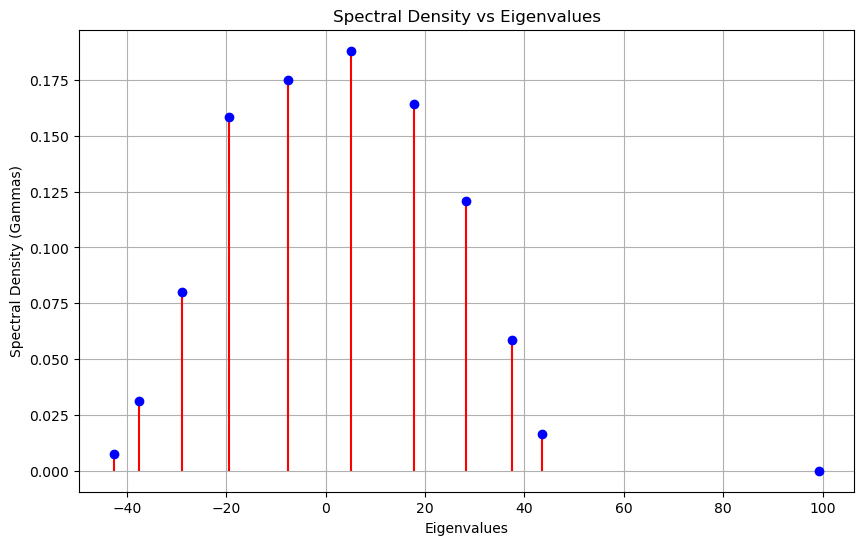

In [22]:
# Assuming 'eigvals' and 'gammas' are already computed as shown in previous discussions
plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(eigvals.cpu().numpy(), gammas.cpu().numpy(), use_line_collection=True)
plt.setp(markerline, color='b', marker='o')  # Blue markers
plt.setp(stemlines, color='r')  # Red stems
plt.setp(baseline, visible=False)  # Hide the baseline

plt.title('Spectral Density vs Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Spectral Density (Gammas)')
plt.grid(True)
plt.show()
